# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

* How does the choice of school play into academic performance?
* Are there differences in achievement based on gender, location, or student attitudes?
* Are there differences in achievement based on teacher practices and attitudes?
* Does there exist inequality in academic achievement?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
# Using low_memory=False here to suppress the dtype errors 
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv("data/pisa2012.csv", low_memory=False, encoding="latin1")

In [6]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [7]:
df.shape

(485490, 636)

In [8]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 636 columns):
Unnamed: 0     int64
CNT            object
SUBNATIO       int64
STRATUM        object
OECD           object
NC             object
SCHOOLID       int64
STIDSTD        int64
ST01Q01        int64
ST02Q01        float64
ST03Q01        int64
ST03Q02        int64
ST04Q01        object
ST05Q01        object
ST06Q01        float64
ST07Q01        object
ST07Q02        object
ST07Q03        object
ST08Q01        object
ST09Q01        object
ST115Q01       float64
ST11Q01        object
ST11Q02        object
ST11Q03        object
ST11Q04        object
ST11Q05        object
ST11Q06        object
ST13Q01        object
ST14Q01        object
ST14Q02        object
ST14Q03        object
ST14Q04        object
ST15Q01        object
ST17Q01        object
ST18Q01        object
ST18Q02        object
ST18Q03        object
ST18Q04        object
ST19Q01        object
ST20Q01        object
ST20Q02     

In [10]:
df.CNT.value_counts().head(20)

Mexico                  33806
Italy                   31073
Spain                   25313
Canada                  21544
Brazil                  19204
Australia               14481
United Kingdom          12659
United Arab Emirates    11500
Switzerland             11229
Qatar                   10966
Colombia                 9073
Finland                  8829
Belgium                  8597
Denmark                  7481
Jordan                   7038
Chile                    6856
Thailand                 6606
Japan                    6351
Chinese Taipei           6046
Peru                     6035
Name: CNT, dtype: int64

In [11]:
df.ST08Q01.unique()

array(['None  ', 'One or two times  ', 'Three or four times  ', nan,
       'Five or more times  '], dtype=object)

## Quality issues

* Dates are object

In [12]:
df_clean = df.copy()

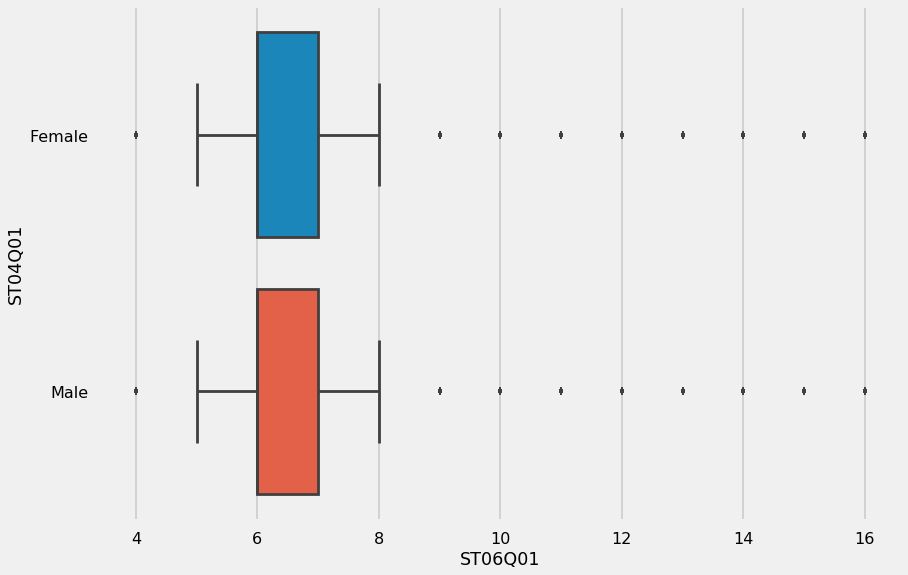

In [24]:
sns.boxplot(data=df_clean, y='ST04Q01', x='ST06Q01')
plt.show()

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!